## Create Dataframe

In [16]:
import json
import pandas as pd
jsonData = json.load((open('../data/annotations/val.json')))

In [17]:
imagesData = jsonData['images']
orig_images_df = pd.DataFrame(imagesData)
orig_images_df.head()

,file_name,vizwiz_url,id,text_detected
0,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True
1,VizWiz_val_00000001.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23432,True
2,VizWiz_val_00000002.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23433,True
3,VizWiz_val_00000003.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23434,True
4,VizWiz_val_00000004.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23435,True


In [18]:
annotationsData = jsonData['annotations']
orig_annotations_df = pd.DataFrame(annotationsData)
orig_annotations_df.head()

,caption,image_id,is_precanned,is_rejected,id,text_detected
0,A computer screen shows a repair prompt on the...,23431,False,False,117155,True
1,a computer screen with a repair automatically ...,23431,False,False,117156,True
2,partial computer screen showing the need of re...,23431,False,False,117157,True
3,Part of a computer monitor showing a computer ...,23431,False,False,117158,True
4,The top of a laptop with a blue background and...,23431,False,False,117159,True


## Filter Dataframe

In [19]:
images_df = orig_images_df.filter(['id','vizwiz_url','text_detected'], axis=1)
images_df.rename(columns={'id': 'image_id', 'vizwiz_url': 'image_url'}, inplace=True)
images_df.set_index('image_id', inplace=True)
images_df.head()

,image_url,text_detected
image_id,,
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True
23432,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True
23433,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True
23434,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True
23435,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True


In [20]:
annotations_df = orig_annotations_df.filter(['image_id','caption'], axis=1)
annotations_df.set_index('image_id', inplace=True)
annotations_df.head()

,caption
image_id,
23431,A computer screen shows a repair prompt on the...
23431,a computer screen with a repair automatically ...
23431,partial computer screen showing the need of re...
23431,Part of a computer monitor showing a computer ...
23431,The top of a laptop with a blue background and...


## Merge Dataframe

In [21]:
captions_df = images_df.merge(annotations_df, how='inner', on='image_id')
captions_df.head()

,image_url,text_detected,caption
image_id,,,
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,A computer screen shows a repair prompt on the...
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,a computer screen with a repair automatically ...
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,partial computer screen showing the need of re...
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,Part of a computer monitor showing a computer ...
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,The top of a laptop with a blue background and...


## Group Data

In [22]:
grouped_captions = captions_df.groupby(['image_id'])
grouped_captions.head()

,image_url,text_detected,caption
image_id,,,
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,A computer screen shows a repair prompt on the...
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,a computer screen with a repair automatically ...
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,partial computer screen showing the need of re...
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,Part of a computer monitor showing a computer ...
23431,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,The top of a laptop with a blue background and...
...,...,...,...
31180,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,A closeup of fiat with a value of 10 on a kit...
31180,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,a single piece of Australian currency sitting ...
31180,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,True,An Australian monetary bill with the value of ...


## Write Data to CSV

In [23]:
captions_df.to_csv(r'captions.csv', index=True)

## Data Visualization

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

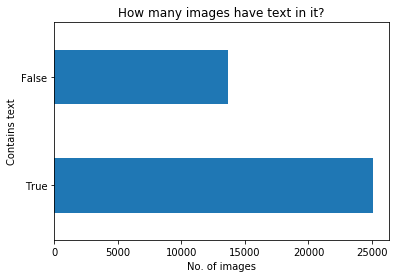

''

In [25]:
df = captions_df.text_detected.value_counts()
df.plot.barh()
plt.title('How many images have text in it?')
plt.xlabel("No. of images")
plt.ylabel("Contains text")
plt.show()
;